# Data Exploration:

### Import

In [95]:
from IPython.display import display
import ipywidgets as widgets
import pandas as pd
from IPython.display import clear_output
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches


### Loading Extracted Dataset

In [ ]:
df = pd.read_csv('../ift6758/data/extracted/shot_goal_20161012_20210707.csv')

In [ ]:
df.head(2)

In [ ]:
season_list = df['season'].unique()
season_list_out = widgets.Output()

season_selection = season_list[0]

seasons_widget = widgets.Select(
    options=season_list,
    value=season_list[0],
    # rows=10,
    description='Season:',
    disabled=False
)

display(seasons_widget, season_list_out)

def on_value_change(change):
    with season_list_out:
        print(change['new'])
        season_selection = change['new']

seasons_widget.observe(on_value_change, names='value')

############################################

gametype_list = df['gameType'].unique()
gametype_list_out = widgets.Output()

gametype_selection = gametype_list[0]

gametype_widget = widgets.Select(
    options=gametype_list,
    value=gametype_list[0],
    # rows=10,
    description='gameType:',
    disabled=False
)
display(gametype_widget, gametype_list_out)

def on_value_change_out(change):
    with season_list_out:
        print(change['new'])
        gametype_selection = change['new']

gametype_widget.observe(on_value_change_out, names='value')

In [ ]:
f1 = df[df['season'] == season_selection]
f2 = f1[f1['gameType'] == gametype_selection]
game_count = len(f2['gameId'].unique())

In [ ]:
game_widget = widgets.IntSlider(
    min=0,
    max=game_count
)
game_list_out = widgets.Output()
game_selection = 0
display(game_widget, game_list_out)
f3 = None
gameId = None
def on_value_change_game(change):
    with game_list_out:
        #print(change['new'])
        game_selection = change['new']
        #f3 = f2[f2['gameId'] == game_selection]
        gameId = f2.loc[[game_selection]]['gameId']
        print(gameId)

game_widget.observe(on_value_change_game, names='value')

In [103]:
gameId = f2.loc[[game_widget.value]]['gameId'].values[0]
f3 = f2[f2['gameId']== gameId]
event_count = len(f3)
event_widget = widgets.IntSlider(
    min=0,
    max=event_count
)
event_list_out = widgets.Output()
event_selection = 0
display(event_widget, event_list_out)

def on_value_change_event(change):
    with event_list_out:
        event_selection = change['new']
        clear_output(wait=True)
        print(f3.loc[[event_selection]])

        x = f3.loc[[event_widget.value]]['x'].values[0]
        y = f3.loc[[event_widget.value]]['y'].values[0]
        img = mpimg.imread('../ift6758/1hockey.jpg')
        fig, ax = plt.subplots()
        ax.imshow(img, extent=[-100,100,-42.5,42.5])
        rect = patches.Rectangle((x, y), 4, 4, linewidth=1, edgecolor='b', facecolor='none')
        ax.add_patch(rect)

        plt.show()
       

event_widget.observe(on_value_change_event, names='value')



IntSlider(value=0, max=68)

Output()

In [89]:
x = f3.loc[[event_widget.value]]['x'].values[0]
y = f3.loc[[event_widget.value]]['y'].values[0]

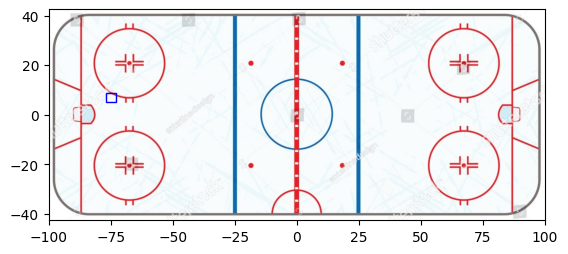

In [102]:
img = mpimg.imread('../ift6758/1hockey.jpg')
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100,100,-42.5,42.5])
rect = patches.Rectangle((x, y), 4, 4, linewidth=1, edgecolor='b', facecolor='none')
ax.add_patch(rect)

plt.show()